In [1]:
from  pathlib import Path
vehicle_data = Path("../../../data/miscel/vehicle.csv")
vehicle_data = vehicle_data.as_posix()

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
%matplotlib inline 



In [3]:
sv_data = pd.read_csv(vehicle_data)
display (sv_data)
print ("col index = vehicule_id")
sv_data = pd.read_csv(vehicle_data,index_col=0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


col index = vehicule_id


In [4]:
display (sv_data.head(5))
print (sv_data.columns.to_list())
sv_data["class"] = sv_data["class"].replace(to_replace=["car","bus","van"],value=[0,1,2]).astype(int)


,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,,,,,,,,,,,,,,,,,,
95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


['circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']


/tmp/ipykernel_1279/2021121740.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sv_data["class"] = sv_data["class"].replace(to_replace=["car","bus","van"],value=[0,1,2]).astype(int)


In [5]:
# Insérez votre code ici
# sv_data= sv_data.drop(columns=["class"])

print (sv_data.isna().sum())
sv_data.dropna(inplace=True)

print(sv_data.dtypes)
print (sv_data.describe())



circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
sca

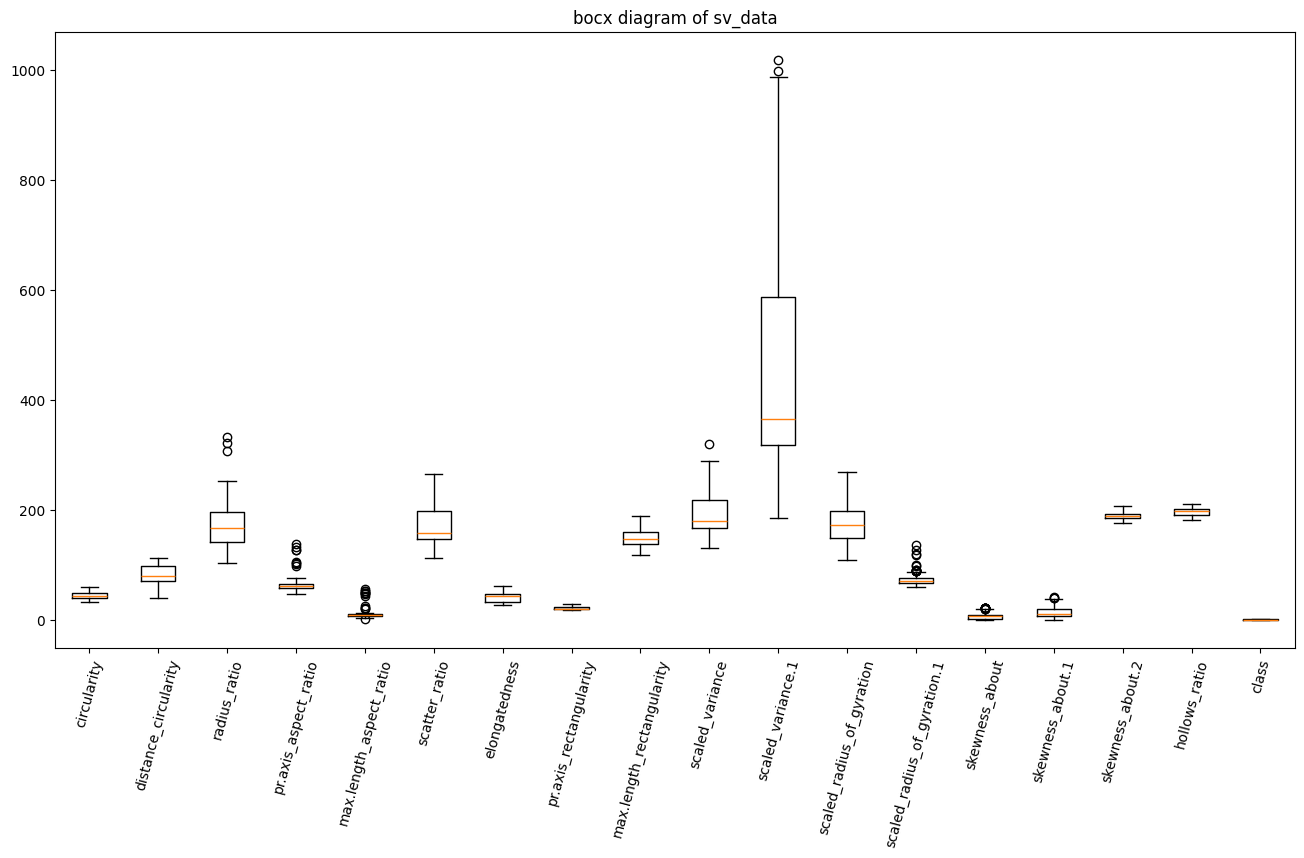

In [6]:


labels = sv_data.columns.to_list()
liste = []
for column in sv_data.columns :
        liste.append(sv_data[column])
plt.figure(figsize=(16,8))
plt.title('bocx diagram of sv_data')
plt.boxplot(liste, tick_labels = labels)
plt.xticks(rotation=75)
plt.show()



In [7]:
# Insérez votre code ici
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sv_data_scaled = scaler.fit_transform(sv_data)

sv_data = pd.DataFrame(sv_data_scaled, index=sv_data.index, columns=sv_data.columns)

In [8]:
kmeans = KMeans(n_clusters = 45)
kmeans.fit(sv_data)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [9]:
# Insérez votre code ici
# Centroids and labels
centroids_kmeans1 = kmeans.cluster_centers_

In [16]:
print ("vector of cluster number of each sample \n",kmeans.labels_.size)
kmeans1_prediction = kmeans.labels_

vector of cluster number of each sample 
 813


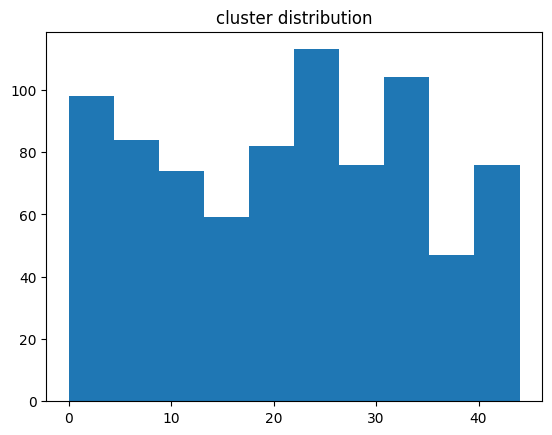

rather smooth distribution 


In [14]:

plt.hist ( kmeans.labels_)
plt.title("cluster distribution")
plt.show()

print ("rather smooth distribution ")



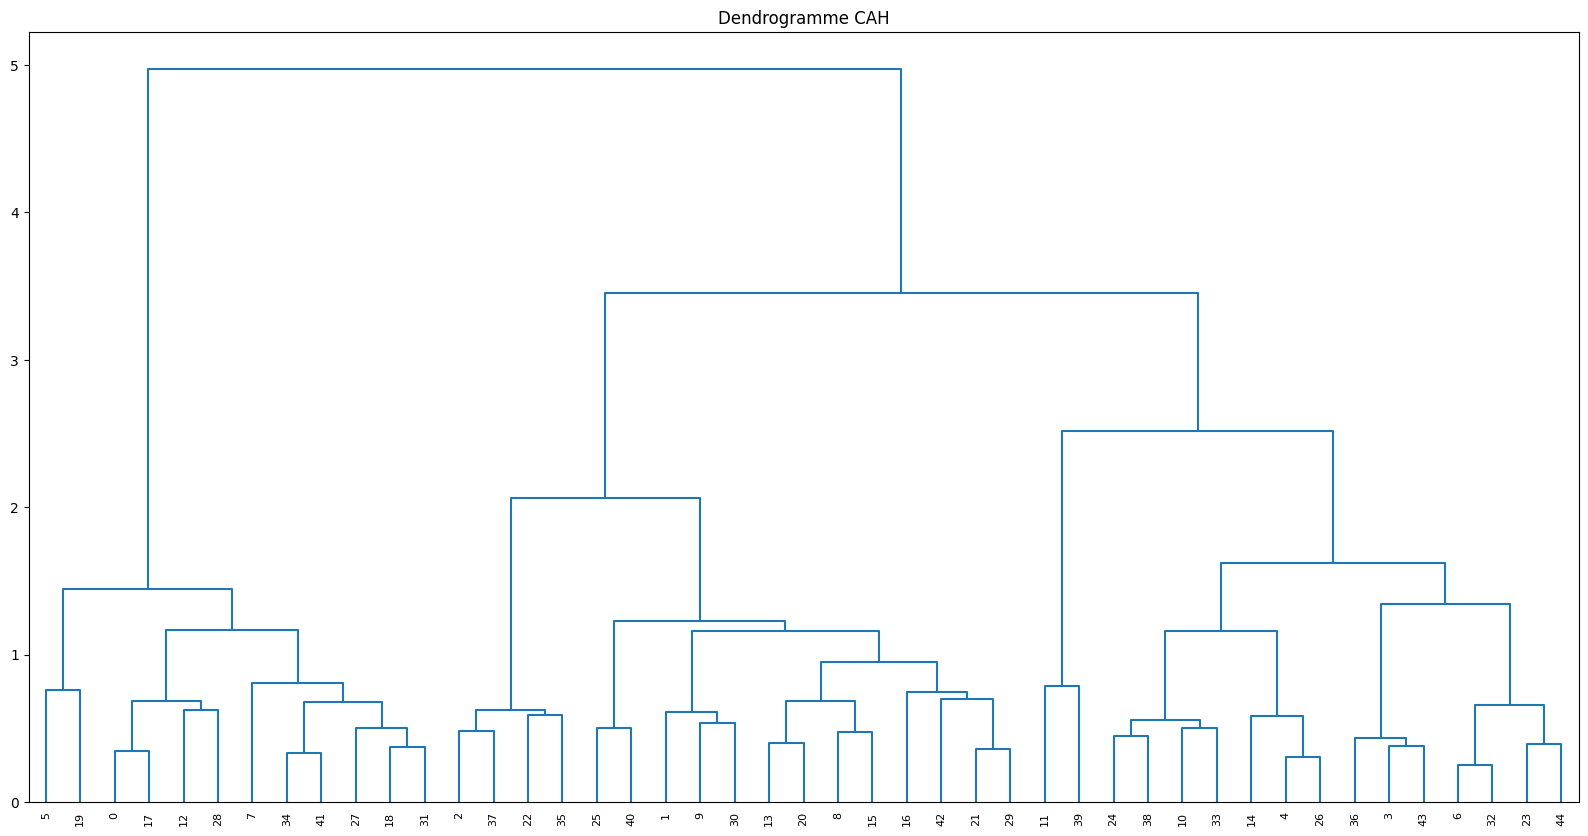

In [12]:
# Insérez votre code ici
# Importation des packages nécessaires pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialisaion de la figrue
plt.figure(figsize=(20, 10))

# Génération de la matrice des liens
Z = linkage(centroids_kmeans1, method = 'ward', metric = 'euclidean')

# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z, labels = range (0,len(centroids_kmeans1)), leaf_rotation = 90., color_threshold = 0)
plt.show()

n_clusters_cah = 4



In [13]:
cluster = AgglomerativeClustering(n_clusters = 4)

# Apprentissage des données 
cluster.fit(centroids_kmeans1)

# Calcul des labels du data set
cah_clusters = cluster.labels_

print (cah_clusters)

[1 0 0 2 2 1 2 1 0 0 2 3 1 0 2 0 0 1 1 1 0 0 0 2 2 0 2 1 1 0 0 1 2 2 1 0 2
 0 2 3 0 1 0 2 2]
